## Multivariable LR from File at Google Drive : Keras

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Colab에서 구글 drive을 마운트 하여 데이터 읽어오기

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 1. Data 읽어오기

In [8]:
xy = np.loadtxt('/content/drive/My Drive/DL-2021-IDEC/data/data-01-test-score.csv', delimiter=',')
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

### Step 1. Data

In [9]:
#xy = np.loadtxt('data-01-test-score.csv', delimiter=',')
#x_data = xy[:, 0:-1]
#y_data = xy[:, [-1]]

In [10]:
print("x_data", x_data)
print("y_data", y_data)

x_data [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y_data [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 2. Linear Regression Model (input = 3, output = 1)

In [11]:
epoch=1000

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=3, units=1))

### Step 3. Loss,Optimizer, Metric

In [12]:
model.compile(loss='mse', optimizer='rmsprop')

### Step 4. Train the model

In [13]:
history=model.fit(x_data, y_data, epochs=epoch)

Epoch 1/1000
1/1 [==============================] - 1s 639ms/step - loss: 56008.7812
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 55645.0508
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 55382.3047
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 55162.9961
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 54968.8164
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 54791.2539
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 54625.6211
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 54468.9297
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 54319.2344
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 54175.1445
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 54035.6211
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 53899.9

### Plot the Training loss

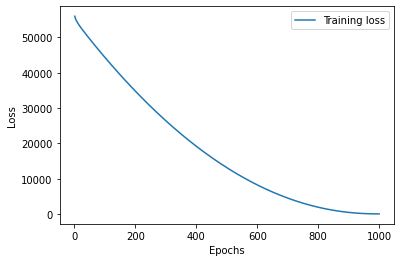

In [14]:
epochs = np.arange(1, epoch+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the Test Results

[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] [[153.56967 ]
 [180.67393 ]
 [179.77715 ]
 [197.77007 ]
 [135.39485 ]
 [102.82605 ]
 [152.39197 ]
 [119.081894]
 [170.57828 ]
 [162.30106 ]
 [143.62955 ]
 [140.7905  ]
 [183.51454 ]
 [149.50261 ]
 [152.7626  ]
 [185.6409  ]
 [138.76471 ]
 [184.8602  ]
 [175.24196 ]
 [157.67772 ]
 [177.27084 ]
 [171.8125  ]
 [168.78316 ]
 [149.77888 ]
 [186.81706 ]]


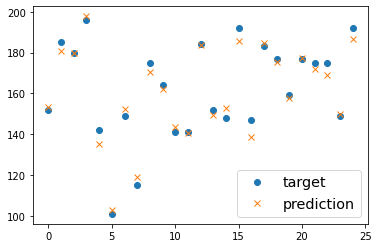

In [15]:
y_pred = model.predict(x_data)
print(y_data, y_pred)
plt.plot(y_data, 'o', label='target')
plt.plot(y_pred, 'x', label='prediction')

plt.legend(fontsize='x-large')
plt.show()